In [2]:
import pandas as pd

merged_df = pd.read_csv('merged_df.csv', on_bad_lines='skip', lineterminator='\n')


In [3]:
merged_df

,index,Year,tconst,ori_release_group,total_gross,genres,Distributor,runtimeMinutes,director,writer,...,popularity_TMDB,average_rating_TMDB,vote_count_TMDB,total_votes,weighted_rating,release_month,release_month_name,release_day,release_day_name,crew
0,0,2010,tt0435761,Toy Story 3,1066969703,"Adventure,Animation,Comedy",Walt Disney Studios Motion Pictures,103,Lee Unkrich,NaN,...,137.106,7.800,14640,928803,8.292119,6,June,3,Wednesday,Tom Hanks
1,2,2010,tt0926084,Harry Potter and the Deathly Hallows: Part 1,960283305,"Adventure,Family,Fantasy",Warner Bros.,146,David Yates,NaN,...,120.267,7.747,19037,635490,7.701408,11,November,3,Wednesday,Daniel Radcliffe
2,3,2010,tt1375666,Inception,828258695,"Action,Adventure,Sci-Fi",Warner Bros.,148,Christopher Nolan,Christopher Nolan,...,123.807,8.400,36613,2657458,8.794489,7,July,4,Thursday,Leonardo DiCaprio
3,4,2010,tt0892791,Shrek Forever After,752600867,"Adventure,Animation,Comedy",DreamWorks,93,Mike Mitchell,NaN,...,156.643,6.379,7332,237745,6.302436,5,May,7,Sunday,Mike Myers
4,5,2010,tt1325004,The Twilight Saga: Eclipse,698491347,"Action,Adventure,Drama",Summit Entertainment,124,David Slade,NaN,...,63.677,6.208,8724,274886,5.135164,6,June,3,Wednesday,Kristen Stewart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2793,2023,tt16606592,The Animal Kingdom,9223430,"Adventure,Drama,Horror",NaN,128,Thomas Cailley,NaN,...,24.426,7.032,695,10225,6.722566,10,October,3,Wednesday,NaN
2193,2794,2023,tt24070754,All Your Faces,9065011,Drama,NaN,118,Jeanne Herry,Jeanne Herry,...,14.921,8.020,551,4473,7.564055,3,March,3,Wednesday,NaN
2194,2795,2023,tt24069962,Cats in the Museum,9024002,"Adventure,Animation,Comedy",NaN,83,Vasiliy Rovenskiy,NaN,...,16.020,6.700,50,625,4.860000,3,March,4,Thursday,NaN
2195,2800,2023,tt26756609,Vacaciones de verano,8209854,"Comedy,Family",NaN,100,Santiago Segura,NaN,...,14.514,5.600,52,810,5.038519,7,July,4,Thursday,NaN


In [4]:
merged_df.columns

Index(['index', 'Year', 'tconst', 'ori_release_group', 'total_gross', 'genres',
       'Distributor', 'runtimeMinutes', 'director', 'writer', 'adult',
       'release_date', 'full_crew', 'budget', 'average_rating_IMDB',
       'vote_count_IMDB', 'popularity_TMDB', 'average_rating_TMDB',
       'vote_count_TMDB', 'total_votes', 'weighted_rating', 'release_month',
       'release_month_name', 'release_day', 'release_day_name', 'crew'],
      dtype='object')

#Box Office Performance by Genre(Arthur)



##ANOVA to compare means of revenue across different genres

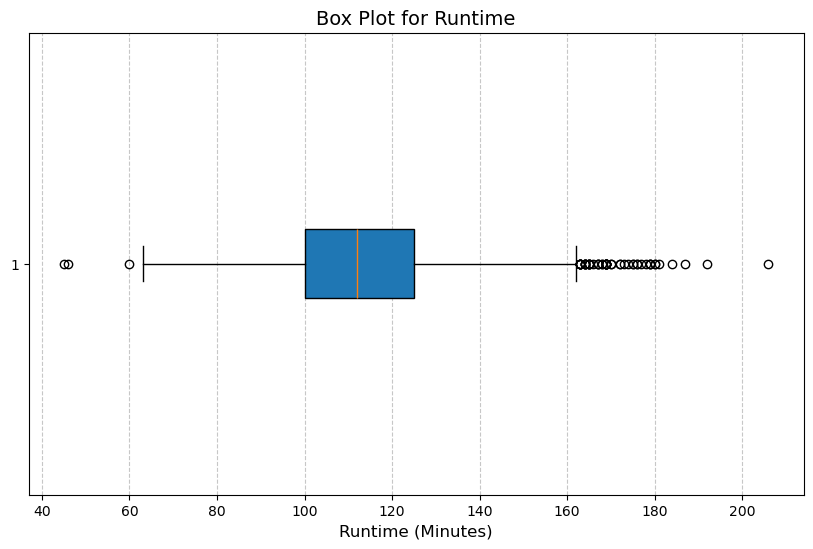

In [5]:
import matplotlib.pyplot as plt
# Box plot for runtime
plt.figure(figsize=(10, 6))
plt.boxplot(merged_df['runtimeMinutes'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot for Runtime', fontsize=14)
plt.xlabel('Runtime (Minutes)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

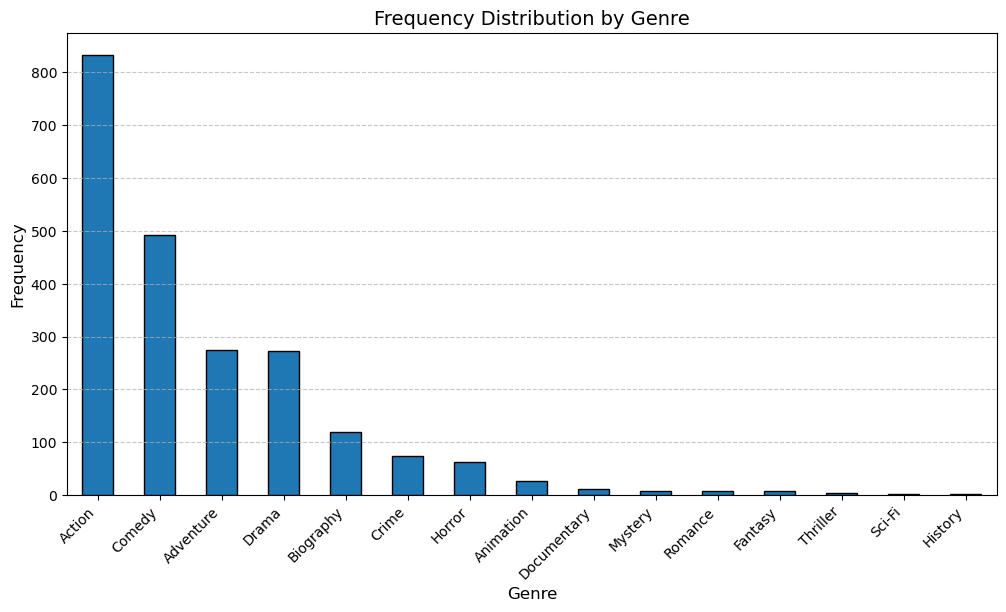

In [6]:

# Splitting the 'genres' column into multiple rows for each genre
merged_df['primary_genre'] = merged_df['genres'].str.split(',').str[0]

frequency_genre = merged_df['primary_genre'].value_counts()
#genre_encoding = {genre: rank for rank, genre in enumerate(frequency_genre.index)}
genre_encoding = {genre: rank for rank, genre in enumerate(frequency_genre.index[::-1])}

merged_df['primary_genre_num'] = merged_df['genres'].map(genre_encoding)

plt.figure(figsize=(12, 6))
frequency_genre.plot(kind='bar', edgecolor='black')
plt.title('Frequency Distribution by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

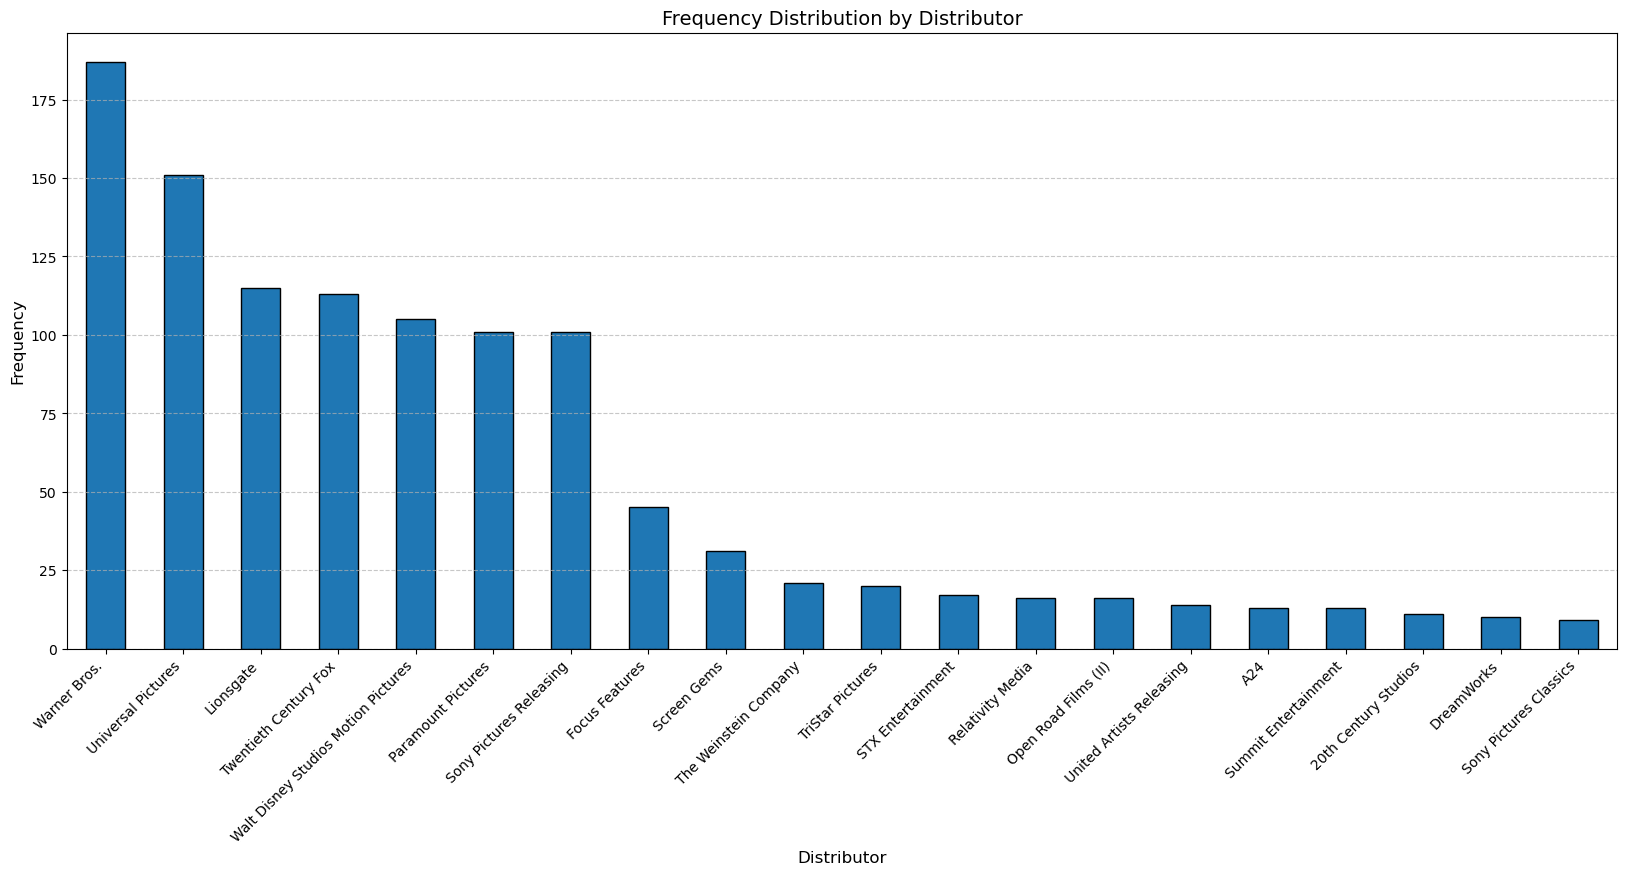

In [7]:
cleaned_distributor_df = merged_df[merged_df['Distributor'] != '-']
frequency_distributor = cleaned_distributor_df['Distributor'].value_counts()

# Bar chart for distributor frequency distribution
plt.figure(figsize=(20, 8))
frequency_distributor.head(20).plot(kind='bar', edgecolor='black')
plt.title('Frequency Distribution by Distributor', fontsize=14)
plt.xlabel('Distributor', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Box Office Performance by years

### Genre

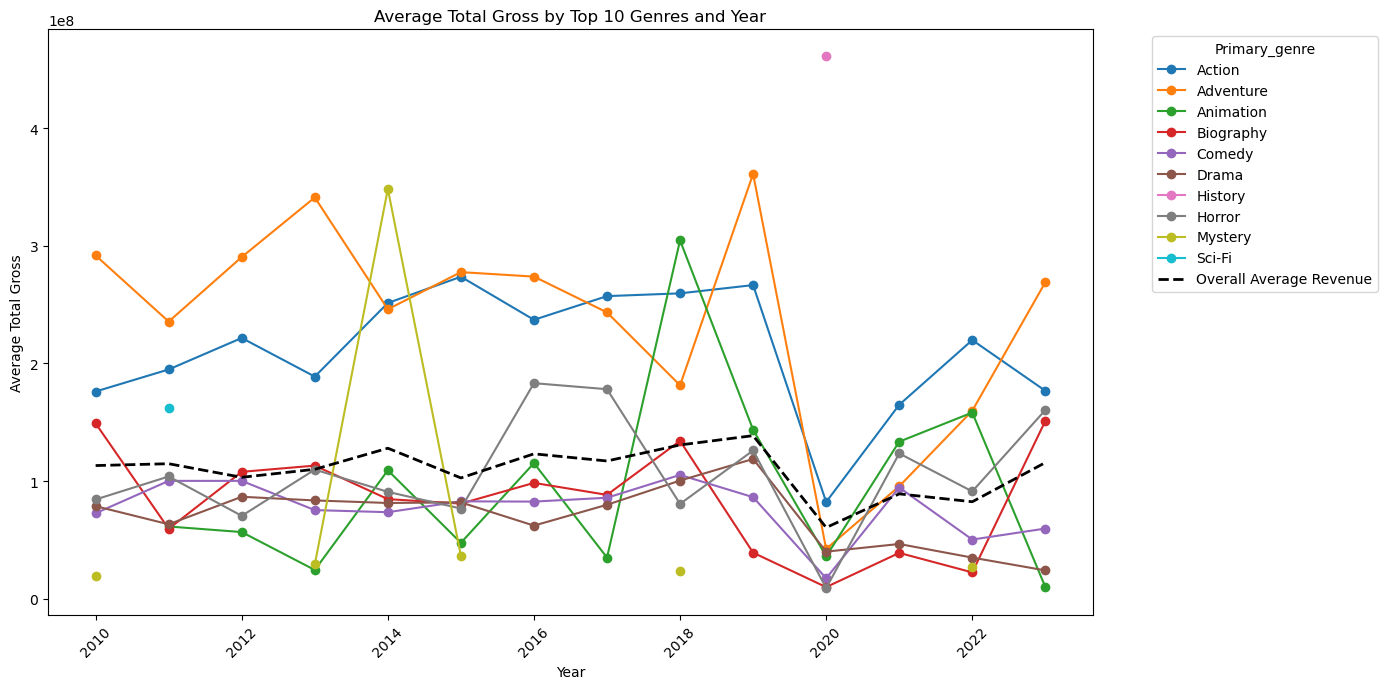

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined
# Group by Year and genres, then calculate the average of total gross
average_gross = merged_df.groupby(['Year', 'primary_genre'])['total_gross'].mean().reset_index()

# Get the average total gross for each genre across all years
genre_totals = average_gross.groupby('primary_genre')['total_gross'].mean().reset_index()

# Select the top 10 genres by average total gross
top_genres = genre_totals.nlargest(10, 'total_gross')['primary_genre']

# Filter the original average_gross DataFrame to include only the top 10 genres
top_average_gross = average_gross[average_gross['primary_genre'].isin(top_genres)]

# Create a pivot table for plotting
pivot_table = top_average_gross.pivot(index='Year', columns='primary_genre', values='total_gross')

# Calculate the average total gross across all genres by year
overall_average = average_gross.groupby('Year')['total_gross'].mean()

# Plotting
plt.figure(figsize=(14, 7))

# Plot the top genres
for genre in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[genre], marker='o', label=genre)

# Plot the overall average as a reference line
plt.plot(overall_average.index, overall_average, color='black', linestyle='--', linewidth=2, label='Overall Average Revenue')

plt.title('Average Total Gross by Top 10 Genres and Year')
plt.xlabel('Year')
plt.ylabel('Average Total Gross')
plt.legend(title='Primary_genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Adventure and Action has been doing great all the time.
Animation is hiting a trough an Biography is doing great in 2023.

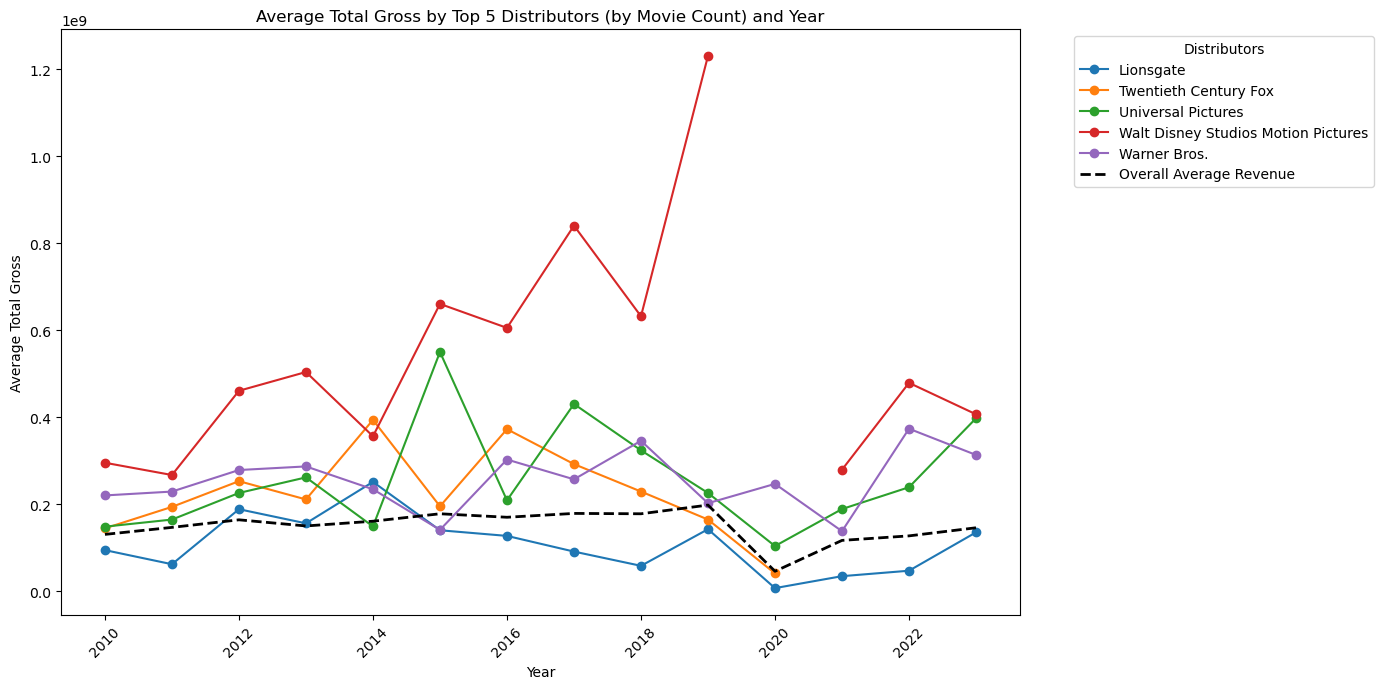

In [9]:
# Assuming merged_df is already defined
# Count the number of movies for each distributor
distributor_counts = merged_df['Distributor'].value_counts().reset_index()
distributor_counts.columns = ['Distributor', 'Movie_Count']

# Select the top 5 distributors by the number of movies
top_distributors = distributor_counts.nlargest(5, 'Movie_Count')['Distributor']

# Filter the original merged_df to include only the top 5 distributors
top_distributor_movies = merged_df[merged_df['Distributor'].isin(top_distributors)]

# Group by Year and Distributor, then calculate the average of total gross
distributor_average_gross = top_distributor_movies.groupby(['Year', 'Distributor'])['total_gross'].mean().reset_index()

# Create a pivot table for plotting
pivot_table_distributors = distributor_average_gross.pivot(index='Year', columns='Distributor', values='total_gross')

# Calculate the average total gross across all movies by year
overall_average_movies = merged_df.groupby('Year')['total_gross'].mean()

# Plotting
plt.figure(figsize=(14, 7))

# Plot the top distributors
for distributor in pivot_table_distributors.columns:
    plt.plot(pivot_table_distributors.index, pivot_table_distributors[distributor], marker='o', label=distributor)

# Plot the overall average as a reference line
plt.plot(overall_average_movies.index, overall_average_movies, color='black', linestyle='--', linewidth=2, label='Overall Average Revenue')

plt.title('Average Total Gross by Top 5 Distributors (by Movie Count) and Year')
plt.xlabel('Year')
plt.ylabel('Average Total Gross')
plt.legend(title='Distributors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

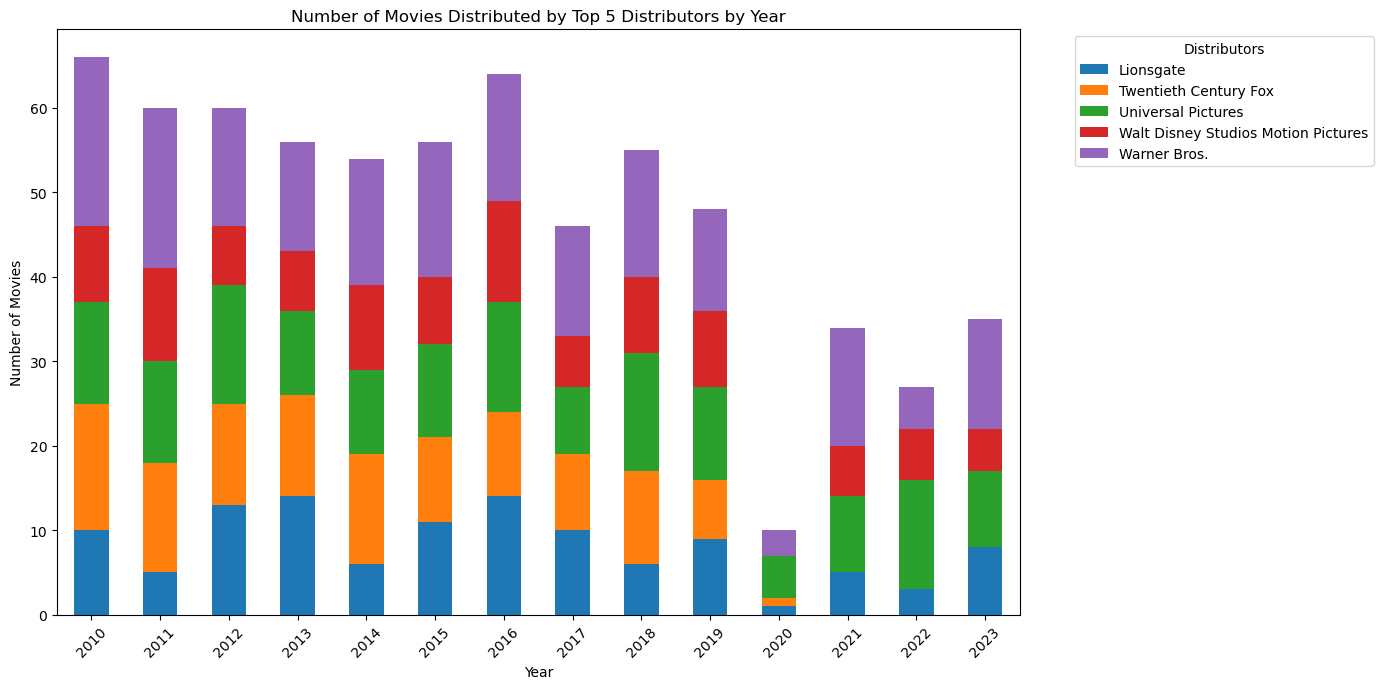

In [10]:
# Assuming merged_df is already defined
# Count the number of movies for each distributor by year
distributor_yearly_counts = merged_df.groupby(['Year', 'Distributor']).size().reset_index(name='Movie_Count')

# Get the total movie counts for each distributor
distributor_totals = distributor_yearly_counts.groupby('Distributor')['Movie_Count'].sum().reset_index()

# Select the top 5 distributors by total movie count
top_distributors = distributor_totals.nlargest(5, 'Movie_Count')['Distributor']

# Filter the original distributor_yearly_counts DataFrame to include only the top 5 distributors
top_distributor_yearly_counts = distributor_yearly_counts[distributor_yearly_counts['Distributor'].isin(top_distributors)]

# Create a pivot table for plotting
pivot_table = top_distributor_yearly_counts.pivot(index='Year', columns='Distributor', values='Movie_Count').fillna(0)

# Plotting
plt.figure(figsize=(14, 7))
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Number of Movies Distributed by Top 5 Distributors by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Distributors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 2800x1400 with 0 Axes>

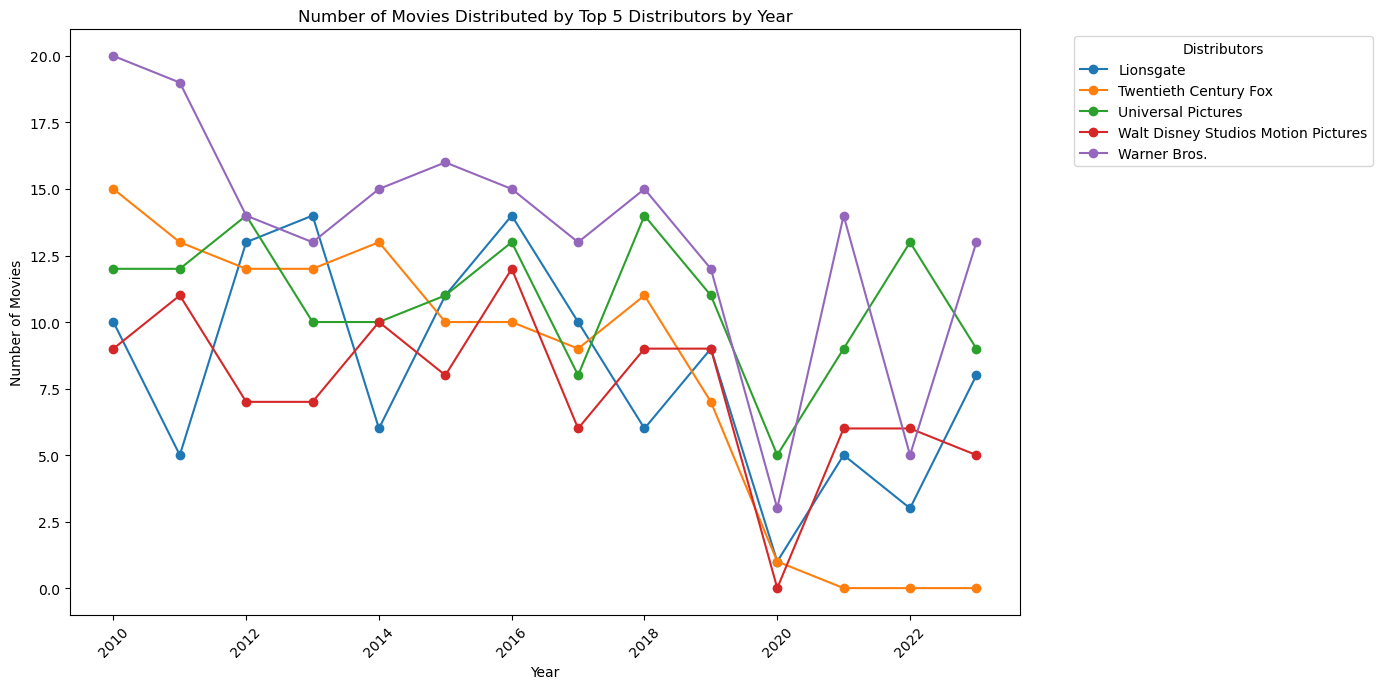

In [11]:
plt.figure(figsize=(28, 14))
pivot_table.plot(kind='line', style='o-',figsize=(14, 7))
plt.title('Number of Movies Distributed by Top 5 Distributors by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Distributors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Runtime

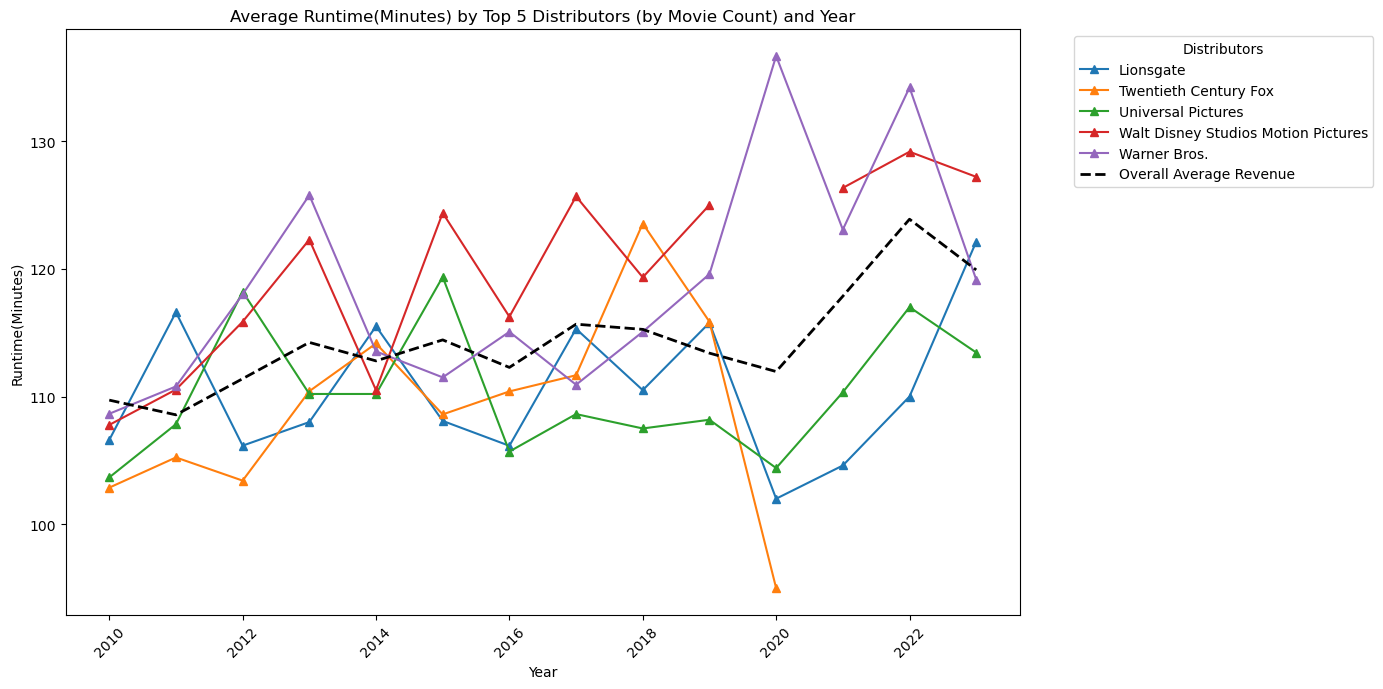

In [12]:
# Select the top 5 distributors by the number of movies
top_distributors = distributor_counts.nlargest(5, 'Movie_Count')['Distributor']

# Filter the original merged_df to include only the top 5 distributors
top_distributor_movies = merged_df[merged_df['Distributor'].isin(top_distributors)]

# Group by Year and Distributor, then calculate the average of total gross
distributor_average_runtimeMinutes = top_distributor_movies.groupby(['Year', 'Distributor'])['runtimeMinutes'].mean().reset_index()

# Create a pivot table for plotting
pivot_table_distributors = distributor_average_runtimeMinutes.pivot(index='Year', columns='Distributor', values='runtimeMinutes')


# Calculate the average total gross across all movies by year
overall_average_movies = merged_df.groupby('Year')['runtimeMinutes'].mean()

# Plotting
plt.figure(figsize=(14, 7))

# Plot the top distributors
for distributor in pivot_table_distributors.columns:
    plt.plot(pivot_table_distributors.index, pivot_table_distributors[distributor], marker='^', label=distributor)

# Plot the overall average as a reference line
plt.plot(overall_average_movies.index, overall_average_movies, color='black', linestyle='--', linewidth=2, label='Overall Average Revenue')

plt.title('Average Runtime(Minutes) by Top 5 Distributors (by Movie Count) and Year')
plt.xlabel('Year')
plt.ylabel('Runtime(Minutes)')
plt.legend(title='Distributors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

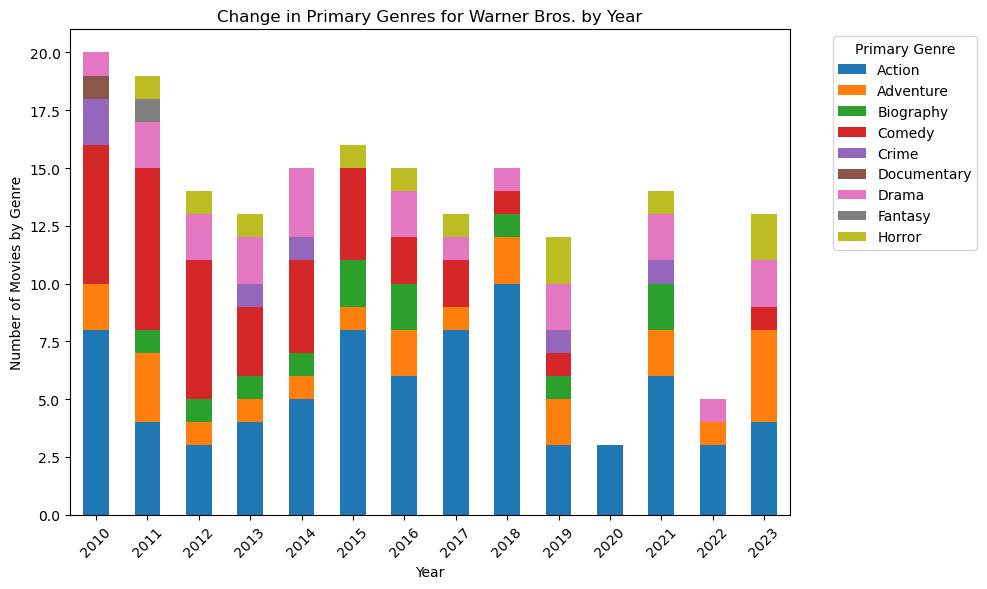

<Figure size 1000x600 with 0 Axes>

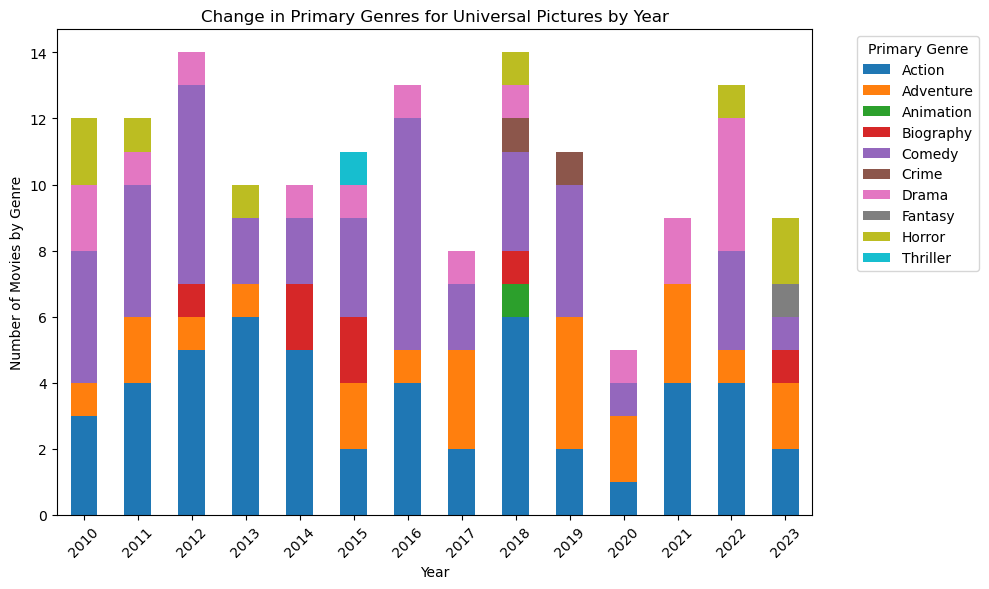

<Figure size 1000x600 with 0 Axes>

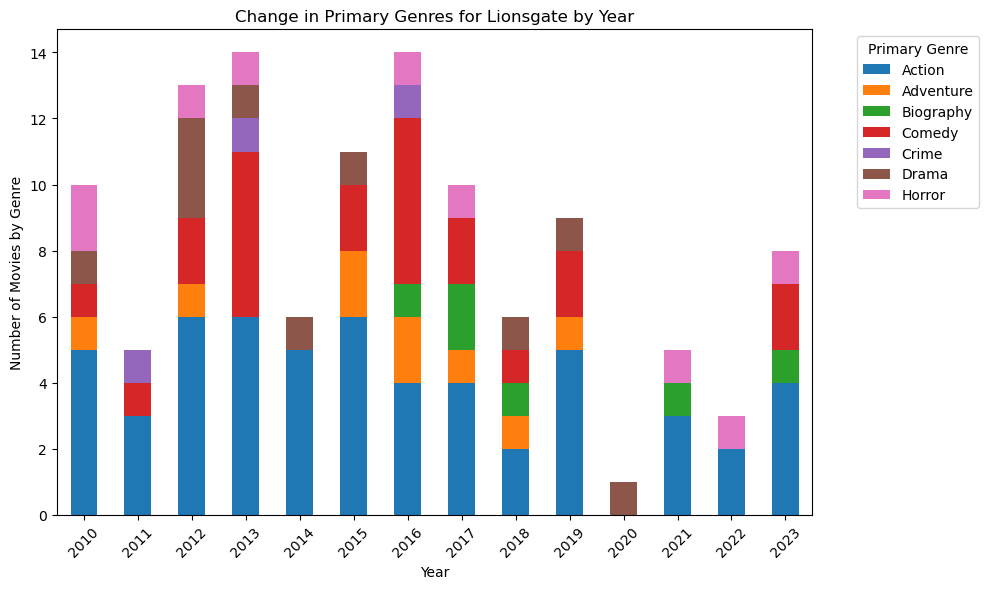

<Figure size 1000x600 with 0 Axes>

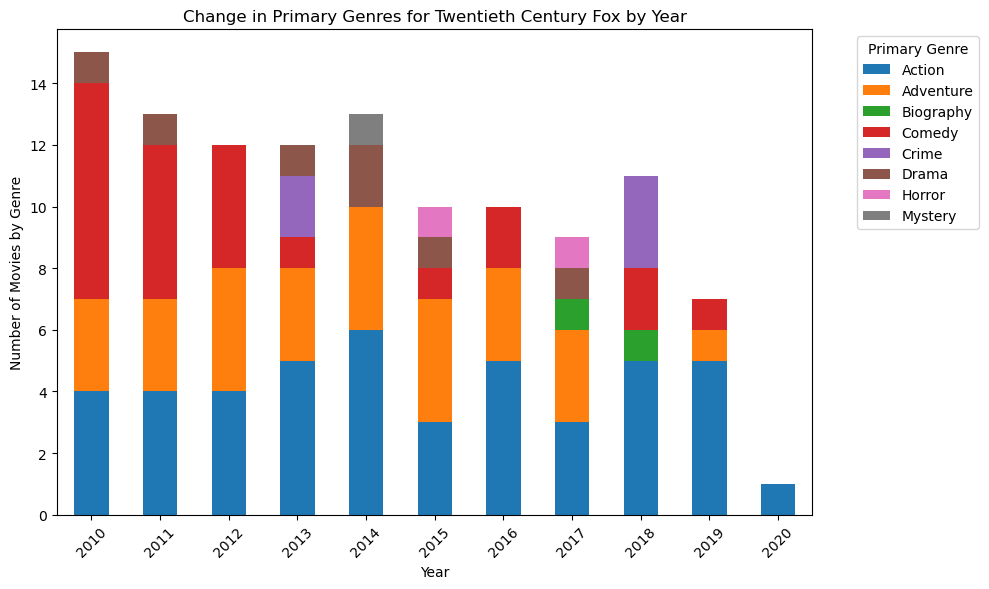

<Figure size 1000x600 with 0 Axes>

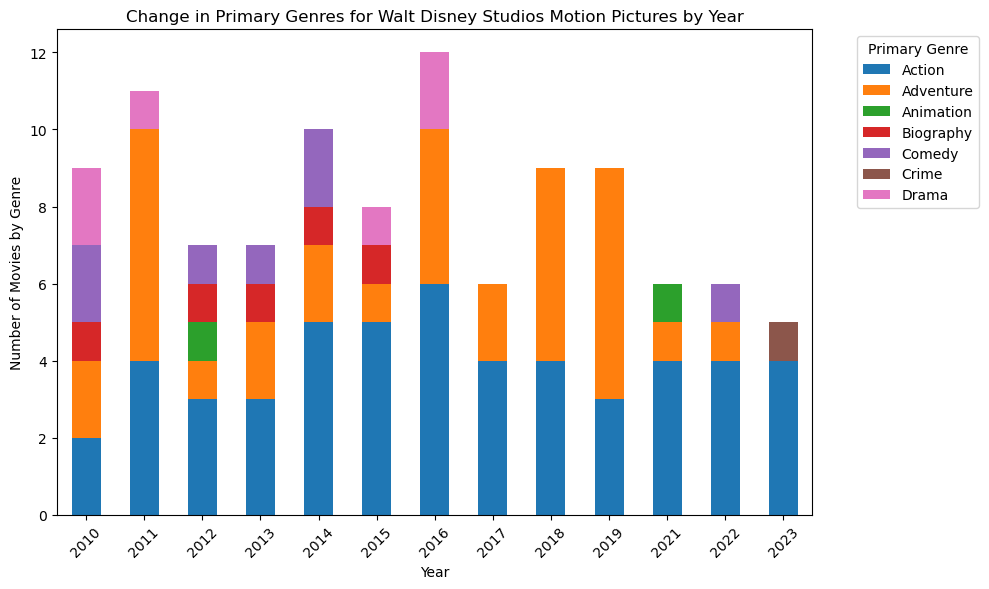

In [16]:
# Extract the primary genre (first genre listed) from the 'genres' column
merged_df['primary_genre'] = merged_df['genres'].str.split(',').str[0]

# Count the number of occurrences of each primary genre for each distributor by year
genre_distribution = merged_df.groupby(['Year', 'Distributor', 'primary_genre']).size().reset_index(name='Count')

# Get the total movie counts for each distributor
distributor_totals = merged_df['Distributor'].value_counts().reset_index()
distributor_totals.columns = ['Distributor', 'Movie_Count']

# Select the top 5 distributors by the number of movies
top_distributors = distributor_totals.nlargest(5, 'Movie_Count')['Distributor']

# Filter the genre_distribution DataFrame to include only the top 5 distributors
top_genre_distribution = genre_distribution[genre_distribution['Distributor'].isin(top_distributors)]

# Create separate stacked bar charts for each distributor
for distributor in top_distributors:
    distributor_data = top_genre_distribution[top_genre_distribution['Distributor'] == distributor]
    
    # Create a pivot table for plotting
    pivot_table = distributor_data.pivot(index='Year', columns='primary_genre', values='Count').fillna(0)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Change in Primary Genres for {distributor} by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies by Genre')
    plt.legend(title='Primary Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### ROI of all

C:\Users\user\AppData\Local\Temp\ipykernel_22780\2965468999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_ROI['ROI'] = merged_df_ROI['total_gross'] / merged_df_ROI['budget']


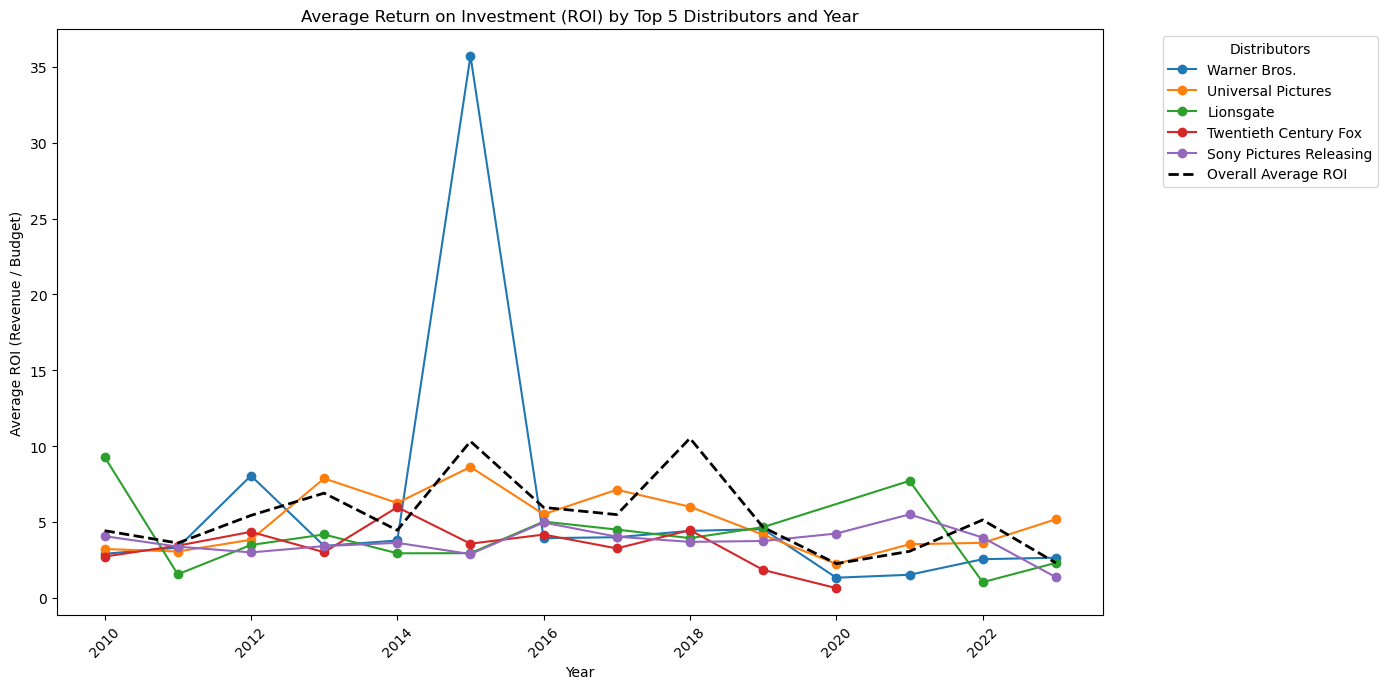

In [21]:
# Assuming merged_df is already defined
# Calculate ROI (Revenue over Budget)
merged_df_ROI = merged_df.dropna(subset='budget')
merged_df_ROI['ROI'] = merged_df_ROI['total_gross'] / merged_df_ROI['budget']

# Group by Year and Distributor, then calculate the average ROI
average_roi = merged_df_ROI.groupby(['Year', 'Distributor'])['ROI'].mean().reset_index()

# Get the total movie counts for each distributor
distributor_totals = merged_df_ROI['Distributor'].value_counts().reset_index()
distributor_totals.columns = ['Distributor', 'Movie_Count']

# Select the top 5 distributors by the number of movies
top_distributors = distributor_totals.nlargest(5, 'Movie_Count')['Distributor']

# Filter the average ROI DataFrame to include only the top 5 distributors
top_average_roi = average_roi[average_roi['Distributor'].isin(top_distributors)]

# Calculate the overall average ROI across all distributors by year
overall_average_roi = merged_df_ROI.groupby('Year')['ROI'].mean()

# Plotting
plt.figure(figsize=(14, 7))

# Plot the average ROI for top distributors
for distributor in top_distributors:
    distributor_data = top_average_roi[top_average_roi['Distributor'] == distributor]
    plt.plot(distributor_data['Year'], distributor_data['ROI'], marker='o', label=distributor)

# Plot the overall average ROI as a reference line
plt.plot(overall_average_roi.index, overall_average_roi, color='black', linestyle='--', linewidth=2, label='Overall Average ROI')

plt.title('Average Return on Investment (ROI) by Top 5 Distributors and Year')
plt.xlabel('Year')
plt.ylabel('Average ROI (Revenue / Budget)')
plt.legend(title='Distributors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Filter the DataFrame for the specified distributor and year
filtered_df = merged_df_ROI.query('Distributor == "Warner Bros." and Year == 2015')

# Sort the result by ROI in descending order
sorted_df = filtered_df.sort_values(by='ROI', ascending=False)

# Display the relevant columns
result = sorted_df[['ori_release_group', 'Distributor', 'total_gross', 'budget', 'ROI']]

result

,ori_release_group,Distributor,total_gross,budget,ROI
955,The Gallows,Warner Bros.,42964410,100000.0,429.644100
893,Magic Mike XXL,Warner Bros.,122613057,14500000.0,8.456073
876,The Intern,Warner Bros.,194764672,40000000.0,4.869117
858,San Andreas,Warner Bros.,474590832,110000000.0,4.314462
899,Vacation,Warner Bros.,107228221,31000000.0,3.458975
896,Get Hard,Warner Bros.,111811453,40000000.0,2.795286
861,Mad Max: Fury Road,Warner Bros.,379436354,150000000.0,2.529576
903,Black Mass,Warner Bros.,99975678,53000000.0,1.886334
948,Entourage,Warner Bros.,49263404,30000000.0,1.642113
897,The Man from U.N.C.L.E.,Warner Bros.,110045109,75000000.0,1.467268


### Runtime & revenue(Regression)

                            OLS Regression Results                            
Dep. Variable:            total_gross   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           4.71e-25
Time:                        00:06:43   Log-Likelihood:                -45476.
No. Observations:                2197   AIC:                         9.096e+04
Df Residuals:                    2195   BIC:                         9.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.598e+08   3.01e+07     -5.

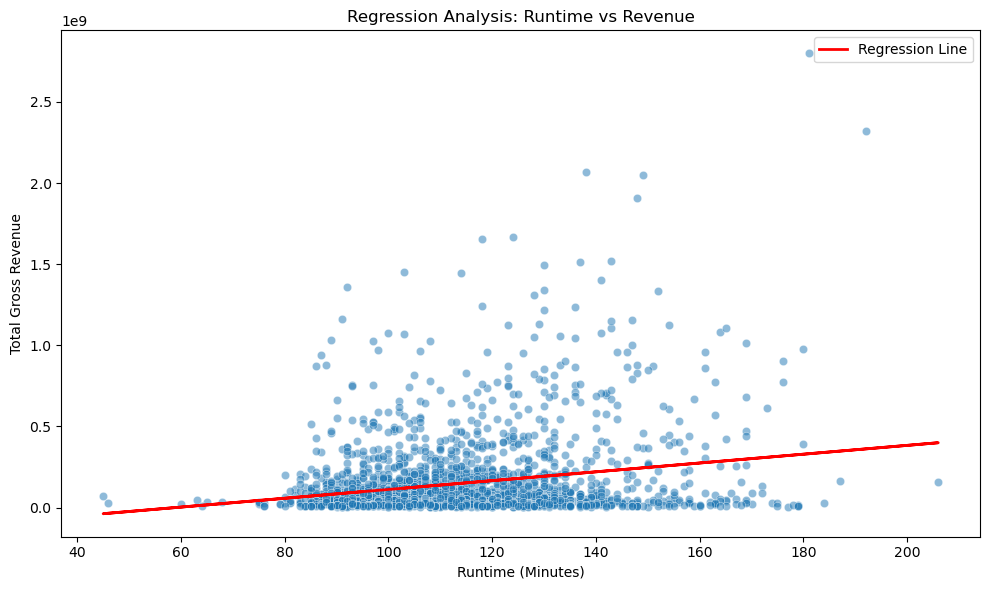

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming merged_df is already defined
# Prepare the data
data = merged_df[['runtimeMinutes', 'total_gross']].dropna()

# Add a constant to the model (for the intercept)
X = sm.add_constant(data['runtimeMinutes'])
y = data['total_gross']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['runtimeMinutes'], y=data['total_gross'], alpha=0.5)
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Total Gross Revenue')
plt.title('Regression Analysis: Runtime vs Revenue')

# Plot the regression line
predictions = model.predict(X)
plt.plot(data['runtimeMinutes'], predictions, color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.tight_layout()
plt.show()

### Weekdays

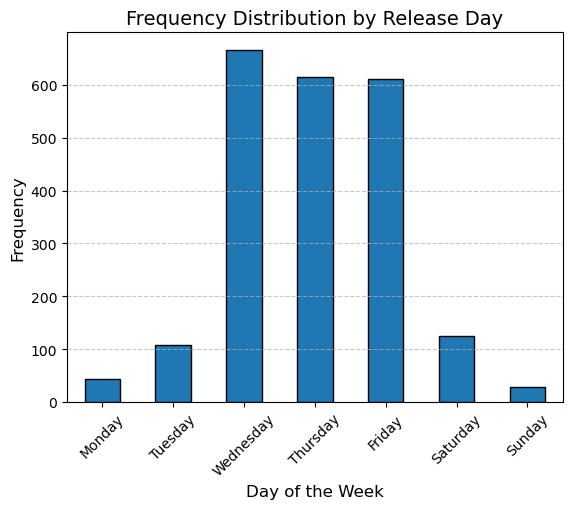

In [35]:
# Frequency counts for months and days
month_counts = merged_df['release_month_name'].value_counts()
day_counts = merged_df['release_day_name'].value_counts()

# Bar chart for release days
# plt.figure(figsize=(10, 6))
day_counts.sort_index(key=lambda x: pd.Categorical(x, categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])).plot(kind='bar', edgecolor='black')
plt.title('Frequency Distribution by Release Day', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

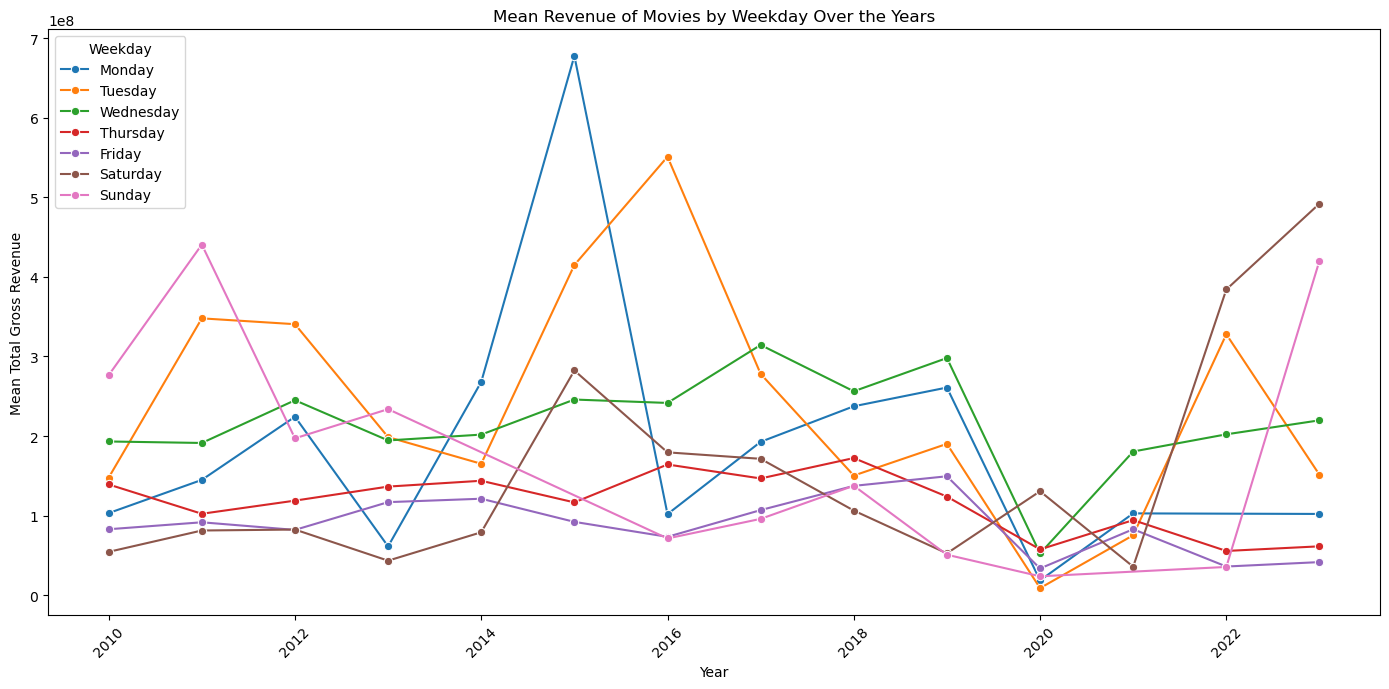

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df contains a 'release_date' column and 'total_gross'

# Convert 'release_date' to datetime if it's not already
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# Extract the year and weekday (0=Monday, 6=Sunday)
merged_df['Year'] = merged_df['release_date'].dt.year
merged_df['Weekday'] = merged_df['release_date'].dt.day_name()

# Group by Year and Weekday to calculate the mean total gross
mean_revenue = merged_df.groupby(['Year', 'Weekday'])['total_gross'].mean().reset_index()

# Sort weekdays for consistent plotting
mean_revenue['Weekday'] = pd.Categorical(mean_revenue['Weekday'], 
                                          categories=['Monday', 'Tuesday', 'Wednesday', 
                                                      'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                          ordered=True)
mean_revenue = mean_revenue.sort_values(by=['Year', 'Weekday'])

# Plotting the mean revenue in a line chart with Year on the x-axis
plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_revenue, x='Year', y='total_gross', hue='Weekday', marker='o')
plt.title('Mean Revenue of Movies by Weekday Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Total Gross Revenue')
plt.xticks(rotation=45)
plt.legend(title='Weekday')
plt.tight_layout()
plt.show()